<a href="https://colab.research.google.com/github/tonpiplaifa/data_viz/blob/main/Pandas102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [5]:
path = '/content/drive/My Drive/Data_viz'

In [6]:
covid_file_path = os.path.join(path,'pm-18-jan-2021.csv')
print(covid_file_path) #ดีที่ os รันที่ไหนเชื่อมแบบนั้นให้ทันที

/content/drive/My Drive/Data_viz/pm-18-jan-2021.csv


In [7]:
a = path + '/pm-18-jan-2021.csv'
print(a)

/content/drive/My Drive/Data_viz/pm-18-jan-2021.csv


In [8]:
data_covid = pd.read_csv(covid_file_path)
data_covid.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,1,1/12/2020,NaN,หญิง,61.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,1/17/2020,NaN,หญิง,74.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,1/22/2020,NaN,หญิง,73.0,Thailand,นครปฐม,นครปฐม,เมือง,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,1/22/2020,NaN,ชาย,68.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,1/24/2020,NaN,หญิง,66.0,China,นนทบุรี,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ


##isnull() None?
ที่เค้าไปเชคจะต้องเป็น array

In [9]:
data_covid.isnull()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,False,False,True,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
12418,False,False,False,False,False,False,False,False,False,False
12419,False,False,False,False,False,False,False,False,False,False
12420,False,False,False,False,False,False,False,False,False,False
12421,False,False,False,False,False,False,False,False,False,False


any() เอาค่าความจริงภายในแต่ละ column มา OR กัน True คือมีค่าว่างอยู่ในคอลัม

In [10]:
data_covid.isnull().any()

No.                      False
announce_date            False
notification_date         True
sex                       True
age                       True
nationality               True
province_of_isolation     True
province_of_onset         True
district_of_onset         True
risk                      True
dtype: bool

all() เอาค่าความจริงภายในแต่ละ column มา AND กัน มีเท็จนิดเดียวก็ว่างเลย

In [11]:
data_covid.isnull().all()

No.                      False
announce_date            False
notification_date        False
sex                      False
age                      False
nationality              False
province_of_isolation    False
province_of_onset        False
district_of_onset        False
risk                     False
dtype: bool

####Tip

In [12]:
data_covid.iloc[0,0].isnull() #จะต้องเป็น array

AttributeError: ignored

In [ ]:
data_covid.iloc[0,0]

In [ ]:
data_covid.iloc[:1,0].isnull() #ใช้ดารตัดตาราง เมื่อจะใช้ isnull() ในการเชคค่าว่าง

## ต่อตารางแกน X แกน y
- ต่อแกน y คือเพิ่ม record (เพิ่มจำนวนข้อมูล)
- ต่อแกน x คือเพิ่ม column (เพิ่มรายละเอียดข้อมูล)


####ต่อแกน y pd.concat

In [13]:
data_covid['province_of_onset']=='ขอนแก่น'

0        False
1        False
2        False
3        False
4        False
         ...  
12418    False
12419    False
12420    False
12421    False
12422    False
Name: province_of_onset, Length: 12423, dtype: bool

In [14]:
dataKK = data_covid[data_covid['province_of_onset']=='ขอนแก่น']
dataKK.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
180,181,3/18/2020,3/15/2020,ชาย,33.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สนามมวย
462,463,3/22/2020,3/21/2020,หญิง,36.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1466,1467,3/30/2020,3/26/2020,ชาย,19.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,คนไทยเดินทางกลับจากต่างประเทศ
1970,1971,4/3/2020,3/31/2020,หญิง,70.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว
2637,2638,4/15/2020,4/14/2020,หญิง,63.0,Thailand,ขอนแก่น,ขอนแก่น,น้ำพอง,สัมผัสผู้เดินทางจากต่างประเทศ


In [15]:
dataUD = data_covid[data_covid['province_of_onset']=='อุดรธานี']
dataUD.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
424,425,3/22/2020,3/21/2020,ชาย,33.0,Thailand,อุดรธานี,อุดรธานี,กุดจับ,สนามมวย
434,435,3/22/2020,3/20/2020,หญิง,47.0,Thailand,อุดรธานี,อุดรธานี,เมือง,สถานบันเทิง
471,472,3/22/2020,3/22/2020,หญิง,26.0,Thailand,อุดรธานี,อุดรธานี,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
883,884,3/25/2020,3/24/2020,ชาย,25.0,Thailand,อุดรธานี,อุดรธานี,เมือง,สถานบันเทิง
885,886,3/25/2020,3/24/2020,หญิง,20.0,Thailand,อุดรธานี,อุดรธานี,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้


In [16]:
dataMS = data_covid[data_covid['province_of_onset']=='มหาสารคาม']
dataMS.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
346,347,3/21/2020,3/20/2020,ชาย,34.0,Thailand,นนทบุรี,มหาสารคาม,เชียงยืน,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
789,790,3/24/2020,3/28/2020,ชาย,48.0,Thailand,มหาสารคาม,มหาสารคาม,พยัคฆภูมิพิสัย,สถานบันเทิง
6690,6691,12/31/2020,12/30/2020,หญิง,42.0,Thailand,มหาสารคาม,มหาสารคาม,บรบือ,Cluster สมุทรสาคร
10802,10803,1/12/2021,1/11/2021,หญิง,25.0,Thailand,สมุทรสาคร,มหาสารคาม,วาปีปทุม,Cluster สมุทรสาคร


In [17]:
dataMYisan = pd.concat([dataKK,dataUD,dataMS])
dataMYisan

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
180,181,3/18/2020,3/15/2020,ชาย,33.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สนามมวย
462,463,3/22/2020,3/21/2020,หญิง,36.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1466,1467,3/30/2020,3/26/2020,ชาย,19.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,คนไทยเดินทางกลับจากต่างประเทศ
1970,1971,4/3/2020,3/31/2020,หญิง,70.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว
2637,2638,4/15/2020,4/14/2020,หญิง,63.0,Thailand,ขอนแก่น,ขอนแก่น,น้ำพอง,สัมผัสผู้เดินทางจากต่างประเทศ
2673,2674,4/17/2020,4/16/2020,ชาย,68.0,Thailand,ขอนแก่น,ขอนแก่น,น้ำพอง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
5948,5949,12/26/2020,12/25/2020,หญิง,32.0,Thailand,ขอนแก่น,ขอนแก่น,แวงใหญ่,Cluster สมุทรสาคร
6082,6083,12/27/2020,12/26/2020,หญิง,36.0,Thailand,ขอนแก่น,ขอนแก่น,แวงใหญ่,Cluster สมุทรสาคร
9333,9334,1/7/2021,1/6/2021,ชาย,17.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,อยู่ระหว่างการสอบสวน
9334,9335,1/7/2021,1/6/2021,ชาย,20.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้


####ต่อแกน x
- จับ 2 ตารางมาต่อกันเลย (merge)
- เลือกเฉพาะบางคอลัมที่เราต้องการ (map)

In [18]:
data_province = data_covid[['No.','announce_date','province_of_onset']]
data_province

,No.,announce_date,province_of_onset
0,1,1/12/2020,กรุงเทพมหานคร
1,2,1/17/2020,กรุงเทพมหานคร
2,3,1/22/2020,นครปฐม
3,4,1/22/2020,กรุงเทพมหานคร
4,5,1/24/2020,กรุงเทพมหานคร
...,...,...,...
12418,12419,1/18/2021,สมุทรปราการ
12419,12420,1/18/2021,สมุทรปราการ
12420,12421,1/18/2021,ชลบุรี
12421,12422,1/18/2021,ชลบุรี


In [19]:
data_human = data_covid[['No.','age','sex','nationality']]
data_human

,No.,age,sex,nationality
0,1,61.0,หญิง,China
1,2,74.0,หญิง,China
2,3,73.0,หญิง,Thailand
3,4,68.0,ชาย,China
4,5,66.0,หญิง,China
...,...,...,...,...
12418,12419,28.0,หญิง,Thailand
12419,12420,27.0,หญิง,Thailand
12420,12421,10.0,ชาย,Thailand
12421,12422,52.0,ชาย,Thailand


# แบบง่าย รู้ว่าสองตาราง record ตรงกัน

In [20]:
full_table1 = data_human.merge(data_province)
full_table1.head() #จับ 2 ตารางมาต่อกันเลย แบบง่าย รู้อยู่แล้วว่าสองตารางมี record ตรงกันจึงไม่กำหนด key ที่ต้องเชื่อมกัน

,No.,age,sex,nationality,announce_date,province_of_onset
0,1,61.0,หญิง,China,1/12/2020,กรุงเทพมหานคร
1,2,74.0,หญิง,China,1/17/2020,กรุงเทพมหานคร
2,3,73.0,หญิง,Thailand,1/22/2020,นครปฐม
3,4,68.0,ชาย,China,1/22/2020,กรุงเทพมหานคร
4,5,66.0,หญิง,China,1/24/2020,กรุงเทพมหานคร


## sort

In [22]:
data_human2 = data_human.sort_values('age')
data_human2

,No.,age,sex,nationality
1987,1988,0.10,ชาย,Thailand
6477,6478,0.11,หญิง,Thailand
11497,11498,0.11,ชาย,Burma
1675,1676,0.30,ชาย,Japan
1075,1076,0.40,ชาย,Thailand
...,...,...,...,...
12405,12406,NaN,NaN,NaN
12406,12407,NaN,NaN,NaN
12407,12408,NaN,NaN,NaN
12408,12409,NaN,NaN,NaN


In [23]:
full_table2 = data_human2.merge(data_province)
full_table2.head()

,No.,age,sex,nationality,announce_date,province_of_onset
0,1988,0.10,ชาย,Thailand,4/4/2020,ระยอง
1,6478,0.11,หญิง,Thailand,12/30/2020,เพชรบุรี
2,11498,0.11,ชาย,Burma,1/16/2021,สมุทรสาคร
3,1676,0.30,ชาย,Japan,4/1/2020,กรุงเทพมหานคร
4,1076,0.40,ชาย,Thailand,3/27/2020,สุราษฎร์ธานี


In [24]:
data_human2_renamed = data_human2.rename(columns={'No.':'patientNumber'})
data_human2_renamed.head()

,patientNumber,age,sex,nationality
1987,1988,0.10,ชาย,Thailand
6477,6478,0.11,หญิง,Thailand
11497,11498,0.11,ชาย,Burma
1675,1676,0.30,ชาย,Japan
1075,1076,0.40,ชาย,Thailand


In [25]:
data_human2_renamed.merge(data_province) #เนื่องจากไม่มีชื่อคอลัมที่เหมือนกันเลย

MergeError: ignored

In [ ]:
full_table3 = data_human2_renamed.merge(data_province,left_on='patientNumber',right_on='No.') #กำหนดคีย์ที่ใส่เชื่อมกันของสองตาราง
full_table3.head()

In [ ]:
full_table3_1 = data_human2_renamed.merge(data_covid,how='left',left_on='age',right_on='age')
full_table3_1.head()

####map()

In [26]:
data_human2_renamed.head()

,patientNumber,age,sex,nationality
1987,1988,0.10,ชาย,Thailand
6477,6478,0.11,หญิง,Thailand
11497,11498,0.11,ชาย,Burma
1675,1676,0.30,ชาย,Japan
1075,1076,0.40,ชาย,Thailand


In [27]:
data_covid.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,1,1/12/2020,NaN,หญิง,61.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,1/17/2020,NaN,หญิง,74.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,1/22/2020,NaN,หญิง,73.0,Thailand,นครปฐม,นครปฐม,เมือง,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,1/22/2020,NaN,ชาย,68.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,1/24/2020,NaN,หญิง,66.0,China,นนทบุรี,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ


**คุณสมบัติของ pandas ก็คือเราสามารถสร้าง column ใหม่ให้ตาราง df ได้ โดย**

```df['ชื่อ column ใหม่'] = (list ที่มีจำนวนสมาชิกเท่ากับจำนวน record ของ df)```

In [28]:
data_human2_renamed.head()

,patientNumber,age,sex,nationality
1987,1988,0.10,ชาย,Thailand
6477,6478,0.11,หญิง,Thailand
11497,11498,0.11,ชาย,Burma
1675,1676,0.30,ชาย,Japan
1075,1076,0.40,ชาย,Thailand


In [29]:
data_human2_renamed['num'] = range(data_human2_renamed.shape[0])
data_human2_renamed

,patientNumber,age,sex,nationality,num
1987,1988,0.10,ชาย,Thailand,0
6477,6478,0.11,หญิง,Thailand,1
11497,11498,0.11,ชาย,Burma,2
1675,1676,0.30,ชาย,Japan,3
1075,1076,0.40,ชาย,Thailand,4
...,...,...,...,...,...
12405,12406,NaN,NaN,NaN,12418
12406,12407,NaN,NaN,NaN,12419
12407,12408,NaN,NaN,NaN,12420
12408,12409,NaN,NaN,NaN,12421


In [30]:
data_human2_renamed['patientNumber'].map(data_covid.set_index('No.')['risk']) #.map มันจะ ผูกค่า 'patientNumber' กับ 'No.' เข้าด้วยกัน แล้ว return list ของค่า ['risk']

1987     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
6477     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
11497                              Cluster สมุทรสาคร
1675     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1075     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
                            ...                     
12405                              Cluster สมุทรสาคร
12406                              Cluster สมุทรสาคร
12407                              Cluster สมุทรสาคร
12408                              Cluster สมุทรสาคร
12409                              Cluster สมุทรสาคร
Name: patientNumber, Length: 12423, dtype: object

In [31]:
data_human2_renamed['detail'] = data_human2_renamed['patientNumber'].map(data_covid.set_index('No.')['risk'])
data_human2_renamed

,patientNumber,age,sex,nationality,num,detail
1987,1988,0.10,ชาย,Thailand,0,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
6477,6478,0.11,หญิง,Thailand,1,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
11497,11498,0.11,ชาย,Burma,2,Cluster สมุทรสาคร
1675,1676,0.30,ชาย,Japan,3,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1075,1076,0.40,ชาย,Thailand,4,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
...,...,...,...,...,...,...
12405,12406,NaN,NaN,NaN,12418,Cluster สมุทรสาคร
12406,12407,NaN,NaN,NaN,12419,Cluster สมุทรสาคร
12407,12408,NaN,NaN,NaN,12420,Cluster สมุทรสาคร
12408,12409,NaN,NaN,NaN,12421,Cluster สมุทรสาคร


##HW7 สร้างตารางใหม่ ที่ค่าใน sex เป็น missing ทั้งหมด
- สรุปว่าทำไม record นั้นๆถึงเป็น missing ใช้การดู นับ อื่นๆ

In [32]:
data_covid.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,1,1/12/2020,NaN,หญิง,61.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,1/17/2020,NaN,หญิง,74.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,1/22/2020,NaN,หญิง,73.0,Thailand,นครปฐม,นครปฐม,เมือง,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,1/22/2020,NaN,ชาย,68.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,1/24/2020,NaN,หญิง,66.0,China,นนทบุรี,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ


In [33]:
data_covid.isnull().any()

No.                      False
announce_date            False
notification_date         True
sex                       True
age                       True
nationality               True
province_of_isolation     True
province_of_onset         True
district_of_onset         True
risk                      True
dtype: bool

In [34]:
sex_fill = data_covid.fillna(value={'sex':'ไม่รู้'})
sex_fill.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,1,1/12/2020,NaN,หญิง,61.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,1/17/2020,NaN,หญิง,74.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,1/22/2020,NaN,หญิง,73.0,Thailand,นครปฐม,นครปฐม,เมือง,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,1/22/2020,NaN,ชาย,68.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,1/24/2020,NaN,หญิง,66.0,China,นนทบุรี,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ


In [35]:
sex_missing = sex_fill[sex_fill['sex']=='ไม่รู้']
sex_missing

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
4391,4392,12/20/2020,NaN,ไม่รู้,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4392,4393,12/20/2020,NaN,ไม่รู้,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4393,4394,12/20/2020,NaN,ไม่รู้,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4394,4395,12/20/2020,NaN,ไม่รู้,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4395,4396,12/20/2020,NaN,ไม่รู้,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
...,...,...,...,...,...,...,...,...,...,...
12405,12406,1/18/2021,1/17/2021,ไม่รู้,NaN,NaN,สมุทรสาคร,NaN,NaN,Cluster สมุทรสาคร
12406,12407,1/18/2021,1/17/2021,ไม่รู้,NaN,NaN,สมุทรสาคร,NaN,NaN,Cluster สมุทรสาคร
12407,12408,1/18/2021,1/17/2021,ไม่รู้,NaN,NaN,สมุทรสาคร,NaN,NaN,Cluster สมุทรสาคร
12408,12409,1/18/2021,1/17/2021,ไม่รู้,NaN,NaN,สมุทรสาคร,NaN,NaN,Cluster สมุทรสาคร


In [36]:
sex_missing.shape #มีจำนวนเรคคอร์ดที่ไม่ได้ระบุเพศไว้อยู่ 2497 ราย

(2497, 10)

In [37]:
sex_missing[sex_missing['nationality']=='Burma'].shape
#เป็นผู้ป่วยสัญชาติเมียนมา 1366 รายจากผู้ป่วยทั้งหมดที่ไม่รู้เพศ

(1366, 10)

In [38]:
sex_missing[sex_missing['province_of_onset']=='สมุทรสาคร'].shape 
#เป็นผู้ป่วยพบในจังหวัดสมุทรสาครถึง 1353 รายจากผู้ป่วยทั้งหมดที่ไม่รู้เพศ

(1353, 10)

In [39]:
ss_sex_missing = sex_missing[sex_missing['province_of_onset']=='สมุทรสาคร']
ss_sex_missing.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
4391,4392,12/20/2020,NaN,ไม่รู้,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4392,4393,12/20/2020,NaN,ไม่รู้,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4393,4394,12/20/2020,NaN,ไม่รู้,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4394,4395,12/20/2020,NaN,ไม่รู้,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4395,4396,12/20/2020,NaN,ไม่รู้,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร


In [40]:
ss_sex_missing[ss_sex_missing['nationality']=='Burma'].shape
#จากผู้ป่วยทั้งหมดที่ไม่รู้เพศพบที่ในจังหวัดสมุทรสาคร 1353 ราย และพบว่าเป็นผู้ป่วยสัญชาติเมียนมา 1349 ราย

(1349, 10)

**สรุป**
- จากการวิเคราะห์พบว่ามีผู้ป่วยที่ไม่ทราบเพศถึง 2497 ราย จากทั้งประเทศไทย ณ 18/1/2564
- เมื่อสังเกตและค้นดูพบว่าเป็นผู้ป่วยพบในจังหวัดสมุทรสาครถึง 1353 ราย จากผู้ป่วยทั้งหมดที่ไม่รู้เพศ
- และพบว่าเป็นผู้ป่วยสัญชาติเมียนมา 1349 ราย จากผู้ป่วยทั้งหมดที่ไม่รู้เพศที่พบในจังหวัดสมุทรสาคร
- ที่เกิด missing ในคอลัมเพศเกิดขึ้นอจจะเป็นเพราะสถานการณ์ในจังหวัดสาครที่พบผู้ป่วยจำนวนมาก และยังมีสัญชาติเมียนมาจำนวนมากทำให้ต้องเร่งในการกักตัว จนอาจจะไม่รอบคอบจนเกิด missing นี้

#### **HW7 ด้วย .groupby()**

In [49]:
data_covid['sex'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
12418    False
12419    False
12420    False
12421    False
12422    False
Name: sex, Length: 12423, dtype: bool

In [52]:
missing_sex = data_covid[data_covid['sex']].isnull()
missing_sex

ValueError: ignored

##.groupby() 
ใช้ในการจัดกลุ่มค่าที่เหมือนกันอยู่ด้วยกัน

In [41]:
data_covid.groupby('nationality') #จับกลุ่มคอลัมที่สนใจ

In [43]:
data_covid.groupby('nationality').count()

,No.,announce_date,notification_date,sex,age,province_of_isolation,province_of_onset,district_of_onset,risk
nationality,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1
Albania,3,3,3,3,3,3,3,2,3
American,1,1,1,1,1,1,1,1,1
American,1,1,1,1,1,1,1,1,1
American Samoa,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
deutsch,1,1,1,1,1,1,1,1,1
thailand,2,2,2,2,2,2,2,2,2
ต่างด้าว,21,21,21,21,21,21,21,21,21


In [46]:
data_covid.groupby('nationality').count().max()

No.                      7221
announce_date            7221
notification_date        6466
sex                      7175
age                      6756
province_of_isolation    7221
province_of_onset        6687
district_of_onset        5488
risk                     7053
dtype: int64

In [48]:
data_covid.groupby('nationality').max(" ")

,No.,age
nationality,,
Afghanistan,4346,31.0
Albania,3522,51.0
American,3862,39.0
American,3905,46.0
American Samoa,11687,21.0
...,...,...
deutsch,3898,55.0
thailand,6824,57.0
ต่างด้าว,2998,43.0


## Create pandas table
เมื่อมีข้อมูลจะสร้างตารางเอง


## Simple visualization

In [54]:
df = pd.read_csv("https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv")
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [56]:
df.groupby('Name').count()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Name,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


**Visualization**

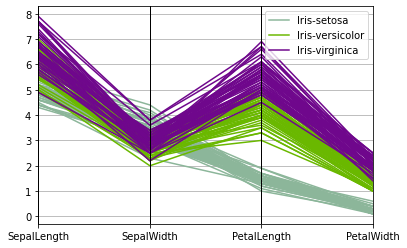

In [57]:
pd.plotting.parallel_coordinates(df,'Name')

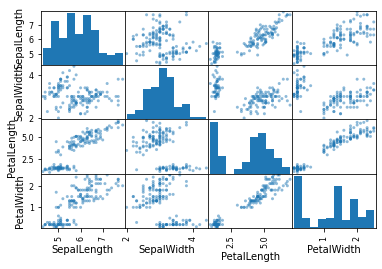

In [63]:
pd.plotting.scatter_matrix(df); #; ลบ output ที่เป็นตัวหนังสือ

##Save table